# Lab 8: Data Management, Dates, and Categorical Data Analysis

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
require(tidyverse)
require(stringr)
require(lubridate)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0

Warning message:
“package ‘tibble’ was built under R version 3.5.2”
Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lubridate


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




## Managing Data

The file `reddit_dirty.txt` contains a dirty version of the reddit comments dataset. To see the first few lines, we can use the command:

In [4]:
read_lines('reddit_dirty.txt', n_max=10)

[1] "postid: 1"                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "https://www.reddit.com/user/br_shadow"                                                                                                                                                                                                                                                                                                                                                                           
 [3] "Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda  https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
 [4] "2017-12-25 15:49:08"                                                                                                                                                                                                                                                                                                                                                                                             
 [5] "postid: 2"                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "https://www.reddit.com/user/Ksalol"                                                                                                                                                                                                                                                                                                                                                                              
 [7] "Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so."                                                                                                                                                                        
 [8] "2017-12-25 17:42:50"                                                                                                                                                                                                                                                                                                                                                                                             
 [9] "postid: 3"                                                                                                                                                                                                                                                                                                                                                                                                       
[10] "https://www.reddit.com/user/itscool83"

### Problem 1
Read in the data and store it in `posts1`. You should get a tibble that looks something like:

```{r}
# A tibble: 40,000 x 1
   var1                                                                        
   <chr>                                                                       
 1 1                                                                           
 2 https://www.reddit.com/user/br_shadow                                       
 3 Comment: Thank you for this, there is a person writing to me through facebo…
 4 2017-12-25 15:49:08                                                         
 5 2                                                                           
 6 https://www.reddit.com/user/Ksalol                                          
 7 Comment: They are not to quick actually. It's mainly the Fentanyl market th…
 8 2017-12-25 17:42:50                                                         
 9 3                                                                           
10 https://www.reddit.com/user/itscool83                                       
# ... with 39,990 more rows
```

### Problem 2

Clean up `posts1` so that each row represents a single reddit post and each variable is in its own column. So you should end up with a table that looks like the following. Store this is `posts2`.

```{r}
# A tibble: 10,000 x 4
   postid user                                            body            time 
    <dbl> <chr>                                           <chr>           <chr>
 1      1 https://www.reddit.com/user/br_shadow           Comment: Thank… 2017…
 2      2 https://www.reddit.com/user/Ksalol              Comment: They … 2017…
 3      3 https://www.reddit.com/user/itscool83           Comment: tell … 2017…
 4      4 https://www.reddit.com/user/Glu7enFree          "Comment: Auti… 2017…
 5      5 https://www.reddit.com/user/Theotheogreato      "Comment: You … 2017…
 6      6 https://www.reddit.com/user/Shadrac121          Comment: Hopfu… 2017…
 7      7 https://www.reddit.com/user/1fzUjhemoSB1QV7zI7  Comment: Si ce… 2017…
 8      8 https://www.reddit.com/user/MinisterOfEducation Comment: I don… 2017…
 9      9 https://www.reddit.com/user/AabidS10            Comment: i don… 2017…
10     10 https://www.reddit.com/user/S3RG10              "Comment: I'm … 2017…
# ... with 9,990 more rows
```

### Problem 3
Note that for this and the following questions, you may want to have the `lubridate` documentation handy (https://lubridate.tidyverse.org/reference/index.html). 

Further process the data by cleaning up the `user` and `body` fields to remove the url and `"Comment: "` portions. Also note that in `posts2` above the `time` variable is a string. Convert this to a datetime object. Store this cleaned data in `posts3`. It should look like:

```{r}
# A tibble: 10,000 x 4
   postid user                body                          time               
    <dbl> <chr>               <chr>                         <dttm>             
 1      1 br_shadow           Thank you for this, there is… 2017-12-25 15:49:08
 2      2 Ksalol              They are not to quick actual… 2017-12-25 17:42:50
 3      3 itscool83           tell her you guys should han… 2017-12-25 18:54:13
 4      4 Glu7enFree          "Autism is a high honor in t… 2017-12-25 07:48:17
 5      5 Theotheogreato      "You thought a cat was your … 2017-12-25 20:58:08
 6      6 Shadrac121          Hopfully she takes wat peopl… 2017-12-25 22:27:31
 7      7 1fzUjhemoSB1QV7zI7  Si ce propui sa facem cu toa… 2017-12-25 07:41:31
 8      8 MinisterOfEducation I don't mean to be impolite,… 2017-12-25 19:28:35
 9      9 AabidS10            i dont have a 720p x265 of i… 2017-12-25 13:20:32
10     10 S3RG10              "I'm dying to try Guatemalan… 2017-12-25 00:48:46
# ... with 9,990 more rows
```

### Problem 4
Sort the data by time of the post. For each post, calculate the duration between that post and the previous post. Write code that plots a histogram of these values.

### Problem 5
Note that the times are currently in the UTC timezone. Convert these to EST (`"America/New_York"`). Then group the data by hour and calculate the mean and the median post length for each hour. Plot these as a line graph.

### Problem 6
Can you make the same plot as Problem 5, but instead grouping posts into 5-minute intervals?

## Logistic Regression Basics

This tutorial primarily leverages the `Default` data provided by the `ISLR` package (located in the working directory for you). This is a simulated data set containing information on ten thousand customers such as whether the customer defaulted, is a student, the average balance carried by the customer and the income of the customer (Source: UC Business Analytics R Programming Guide [https://uc-r.github.io/logistic_regression]).

In [1]:
library(tidyverse)  # data manipulation and visualization
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap



In [2]:
default <- as_tibble(read_csv("Default.csv")) %>% print

Parsed with column specification:
cols(
  default = col_character(),
  student = col_character(),
  balance = col_double(),
  income = col_double()
)


# A tibble: 10,000 x 4
   default student balance income
   <chr>   <chr>     <dbl>  <dbl>
 1 No      No         730. 44362.
 2 No      Yes        817. 12106.
 3 No      No        1074. 31767.
 4 No      No         529. 35704.
 5 No      No         786. 38463.
 6 No      Yes        920.  7492.
 7 No      No         826. 24905.
 8 No      Yes        809. 17600.
 9 No      No        1161. 37469.
10 No      No           0  29275.
# … with 9,990 more rows


If we are trying to classify a customer as a high- vs. low-risk defaulter based on their balance we could use linear regression; however, the figure below illustrates how linear regression would predict the probability of defaulting. Unfortunately, for balances close to zero we predict a negative probability of defaulting; if we were to predict for very large balances, we would get values bigger than 1. These predictions are not sensible, since of course the true probability of defaulting, regardless of credit card balance, must fall between 0 and 1.

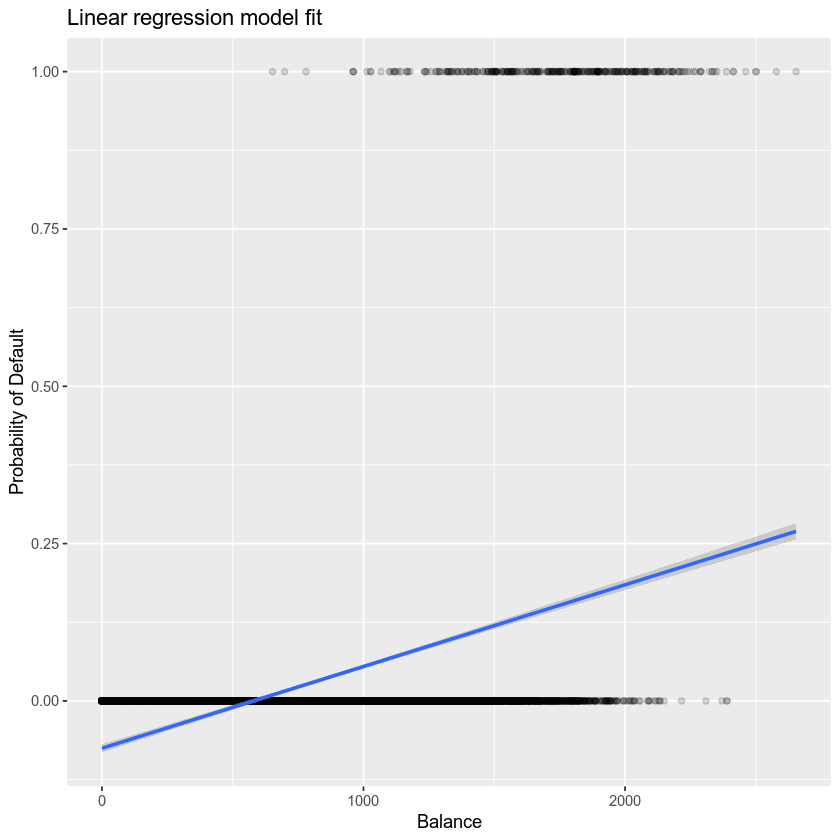

In [3]:
default %>%
  mutate(prob = ifelse(default == "Yes", 1, 0)) %>%
  ggplot(aes(balance, prob)) +
  geom_point(alpha = .15) +
  geom_smooth(method = "lm") +
  ggtitle("Linear regression model fit") +
  xlab("Balance") +
  ylab("Probability of Default")

To avoid this problem, we must model p(X) using a function that gives outputs between 0 and 1 for all values of X.

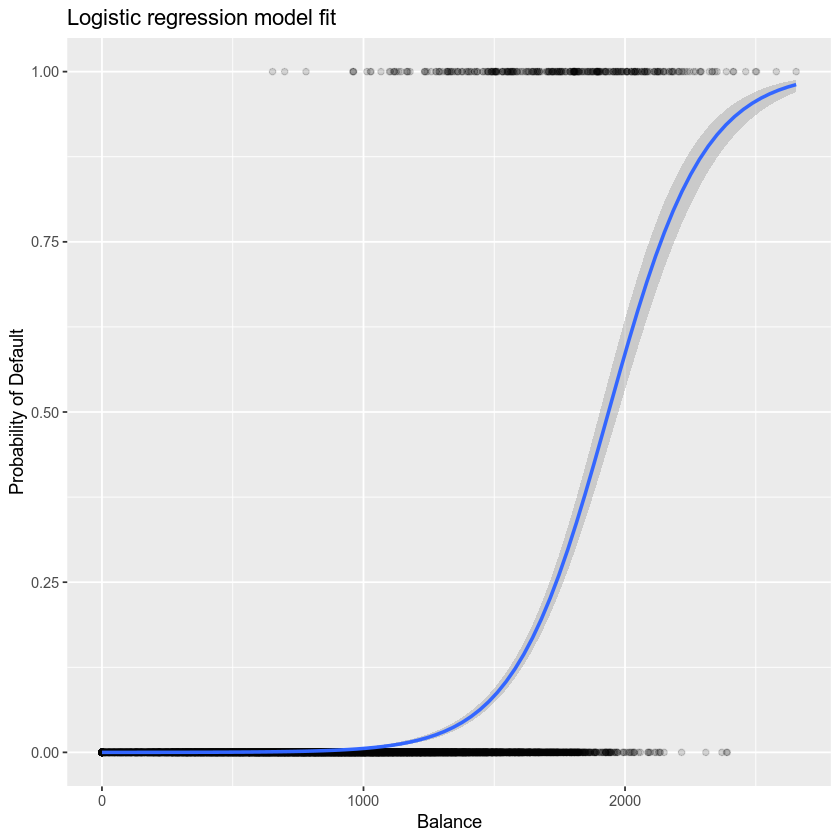

In [4]:
default %>%
  mutate(prob = ifelse(default == "Yes", 1, 0)) %>%
  ggplot(aes(balance, prob)) +
  geom_point(alpha = .15) +
  geom_smooth(method = "glm", method.args = list(family = "binomial")) +
  ggtitle("Logistic regression model fit") +
  xlab("Balance") +
  ylab("Probability of Default")

### Model fitting

In [5]:
default_glm <- default %>% mutate(prob = ifelse(default == "Yes", 1, 0))
model1 <- glm(prob ~ balance, family = "binomial", data = default_glm)
summary(model1)


Call:
glm(formula = prob ~ balance, family = "binomial", data = default_glm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


### Assessing coefficients

The below table shows the coefficient estimates and related information that result from fitting a logistic regression model in order to predict the probability of default = Yes using balance. Bear in mind that the coefficient estimates from logistic regression characterize the relationship between the predictor and response variable on a log-odds scale. Thus, we see that $\hat{\beta}_1 = 0.0055$; this indicates that an increase in balance is associated with an increase in the probability of default. To be precise, a one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units.

In [ ]:
tidy(model1)

We can further interpret the balance coefficient as: for every one dollar increase in monthly balance carried, the odds of the customer defaulting increases by a factor of 1.0055.

In [ ]:
exp(coef(model1))

Many aspects of the coefficient output are similar to those discussed in the linear regression output. For example, we can measure the confidence intervals and accuracy of the coefficient estimates by computing their standard errors. For instance, the estimated coefficient has a p-value < 2e-16 suggesting a statistically significant **LINEAR** relationship between balance carried and the probability of defaulting. We can also use the standard errors to get confidence intervals:

In [ ]:
confint(model1)

In [ ]:
fits = ifelse(model1$fitted.values>0.5, "Yes", "No")
conf.matrix = table(fits, true = default$student)
tidy(conf.matrix)